In [5]:
import pandas as pd
import numpy as np

In [118]:
housing = pd.read_csv("Housing.csv", index_col=0)


In [119]:
housing.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [120]:
#return features and instances in the data
housing.shape

(546, 12)

In [121]:
#return datatype of the features
housing.dtypes

price       float64
lotsize       int64
bedrooms      int64
bathrms       int64
stories       int64
driveway     object
recroom      object
fullbase     object
gashw        object
airco        object
garagepl      int64
prefarea     object
dtype: object

In [122]:
# return features with missing values for each instance
#if false no missing value
housing.isna()
housing.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

In [123]:
# selected price, lotsize columns for the 1st 70 rows
data = housing[['price','lotsize']].loc[:70]

In [124]:
#price is the depedent variable
y=data['price']
#lotsize is the independent variable
x=data['lotsize']
data

,price,lotsize
1,42000.0,5850
2,38500.0,4000
3,49500.0,3060
4,60500.0,6650
5,61000.0,6360
6,66000.0,4160
7,66000.0,3880
8,69000.0,4160
9,83800.0,4800
10,88500.0,5500


In [125]:
import matplotlib.pyplot as plt

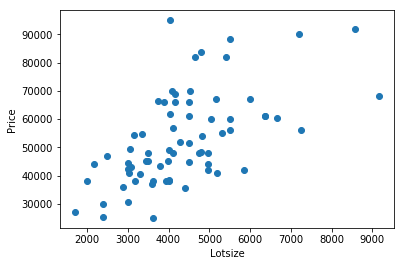

In [126]:
#a scatter plot of price against lotsize using matplotlib 
plt.scatter(data['lotsize'],data['price'])
#plt.scatter(data['price'],data['lotsize'])
plt.ylabel('Price')
plt.xlabel('Lotsize')
plt.show()

In [140]:
#user defined that receives two variables and returns a regression model
from statistics import mean
def best_fit_line(x_values,y_values):
    m = (((mean(x_values)*mean(y_values))-mean(x_values*y_values))/
        ((mean(x_values)*mean(x_values))-mean(x_values*x_values)))
    b = mean(y_values) - m*mean(x_values)
    return m,b
m, b = best_fit_line(data['price'], data['lotsize'])

In [141]:
#regression model learned is:
print("regression line: " + "y = "+str(round(m,4)) + "x + "+ str(round(b,4)))

regression line: y = 0.0508x + 1656.512


In [142]:
#using sklearn to create a Linear Regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
dataset = housing[['price','lotsize']]
x = housing[['lotsize']]
y = housing[['price']]
x

,lotsize
1,5850
2,4000
3,3060
4,6650
5,6360
6,4160
7,3880
8,4160
9,4800
10,5500


In [144]:
#splitting the data using train_test_split to split the data into training and test datasets
#parameters include:the data(x and y arrays),the proportion of data to use as a test set(of type float,int or none,default is 0.25) 
#and the random_state, which is the seed used by the random number generator
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.3)
yTest.head()
#plt.scatter(xTest,yTest, color = 'red')
#plt.ylabel('Price')
#plt.xlabel('Lotsize')
#plt.plot(xTest, linearRegressor.predict(xTest),color = 'blue')
#plt.title('Price vs Lotsize (Training set)')
#plt.xlabel('Lotsize')
#plt.ylabel('Price')
#plt.show()

,price
109,73000.0
207,60000.0
106,43000.0
61,48000.0
107,48000.0


In [170]:
#creating the linear regression model
linearRegressor = LinearRegression()
linearRegressor.fit(xTrain, yTrain)
yPrediction = linearRegressor.predict(xTest)
print('Coefficients: ', linearRegressor.coef_)
print("Mean squared error: %.2f" 
      % mean_squared_error(yTest, yPrediction))
print("SSE",np.sum((yPrediction - yTest)**2))

Coefficients:  [[6.30586407]]
Mean squared error: 559174121.08
SSE price    9.170456e+10
dtype: float64


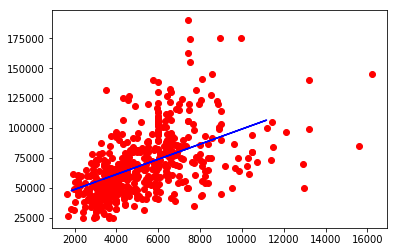

In [152]:
#plotting the model
plt.scatter(x['lotsize'], y['price'], color='red')
plt.plot(xTest['lotsize'], yPrediction, color='blue')
plt.show()

In [156]:
    print("Coefficient: ",linearRegressor.coef_)
    print("Intercept: ",linearRegressor.intercept_)

    print("Model: y= ", str(linearRegressor.intercept_)," + ",str(linearRegressor.coef_),"x")

Coefficient:  [[6.30586407]]
Intercept:  [36150.9642577]
Model: y=  [36150.9642577]  +  [[6.30586407]] x


In [53]:
#using numpy to calculate mse
mse  = np.mean((yTest - yPrediction) **2)
mse


1087724.5786171902

In [56]:
#finding the mean square root
mse2=np.mean(np.square(yTest-yPrediction))
mse2

1087724.5786171902

In [58]:
#finding the sum of squared errors
sse = round(np.sum((yTest - yPrediction)**2),4)
sse


22842216.151

In [59]:
print('Coefficients: \n', linearRegressor.coef_)
# The mean squared error
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(yTest, yPrediction))

Coefficients: 
 [0.04559124]
Mean squared error: 1087724.58


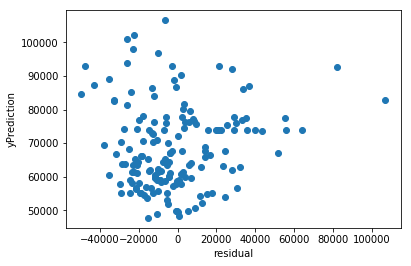

,price
109,17931.443518
207,9187.901768
106,-22157.939002
61,-14131.124246
107,-11608.778616
235,-19068.556482
399,2607.987219
62,-18103.818613
481,15513.851293
376,55545.626052


In [159]:
#plot a residual plot
residual = yTest - yPrediction
plt.scatter(residual,yPrediction)
plt.xlabel('residual')
plt.ylabel('yPrediction')
plt.show()
residual

In [66]:
# MultiLinear regression
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

lr  = LinearRegression()
boston  = load_boston()
type(boston)

sklearn.utils.Bunch

In [68]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [69]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [70]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [71]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [72]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [73]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [85]:
data['Price'] = boston.target

In [86]:
#check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
Price      0
dtype: int64

In [87]:
y = data['Price']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [82]:
x = data.loc[:, data.columns !='Target']
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


xtrain shape:  (404, 13)
ytrain shape:  (404,)
xtest shape:  (102, 13)
ytest shape:  (102,)


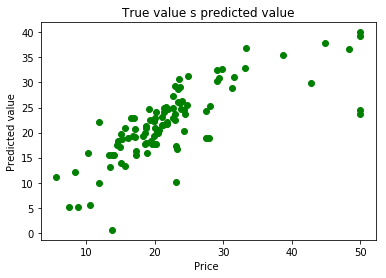

In [99]:
X = boston.data
Y = boston.target
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
#print("Boston shape : ",boston.shape)
print("xtrain shape: ",X_train.shape)
print("ytrain shape: ",y_train.shape)
print("xtest shape: ",X_test.shape)
print("ytest shape: ",y_test.shape)
lineReg = LinearRegression()
lineReg.fit(X_train,y_train)

#predicting based on test
y_test_predicted = lineReg.predict(X_test)

#plotting a scatter graph
plt.scatter(y_test, y_test_predicted, c ='green')
plt.xlabel("Price ")
plt.ylabel("Predicted value")
plt.title("True value Vs predicted value")
plt.show()

In [100]:
#mean squared error 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_predicted)
print("Mean Square Error: ", mse)

Mean Square Error:  33.4507089676911


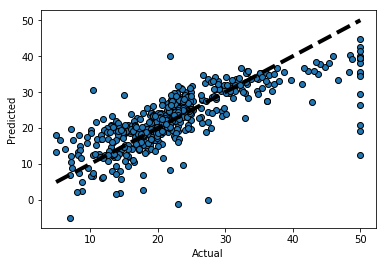

In [101]:
#cross_al using cross Validation to return predicted alue with the same size as y array 
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(lineReg, X,Y,cv=10)
fig,ax = plt.subplots()
ax.scatter(Y, predicted,edgecolors=(0,0,0))
ax.plot([Y.min(),Y.max()],[Y.min(),Y.max()],'k--',lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()


In [164]:
#COEFFICIENTS,mse,sse
from sklearn.metrics import mean_squared_error
print("Intercept: ",lineReg.intercept_)
print("Coefficients: ",lineReg.coef_)
print("Mean squared error: ",mean_squared_error(y_test,y_test_predicted))

Intercept:  38.138692713392714
Coefficients:  [-1.18410318e-01  4.47550643e-02  5.85674689e-03  2.34230117e+00
 -1.61634024e+01  3.70135143e+00 -3.04553661e-03 -1.38664542e+00
  2.43784171e-01 -1.09856157e-02 -1.04699133e+00  8.22014729e-03
 -4.93642452e-01]
Mean squared error:  33.4507089676911


In [168]:
SSE = np.sum((y_test_predicted - y_test)**2)

In [169]:
print("Sum of Squared Errors: ",str(SSE))

Sum of Squared Errors:  3411.972314704492
